In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist

In [3]:
data = pd.read_csv("./train.csv")
data

,sample_name,device_serial,substance_form_display,measure_type_display,prod_substance,PURITY,908.1,914.3,920.5,926.7,...,1620.5,1626.6,1632.8,1639,1645.2,1651.4,1657.6,1663.8,1670,1676.2
0,11140009,M1-1000112,Homogenized Powder,Direct contact,Heroin,58.500000,0.044734,0.042720,0.041361,0.040055,...,0.003972,0.007906,0.012490,0.018123,0.025070,0.033235,0.042502,0.052237,0.061383,0.068823
1,22.0401-P002.02,M1-1000109,Non homogenized powder,Direct contact,Heroin,18.600000,0.063695,0.056980,0.050080,0.043339,...,0.093002,0.099668,0.108805,0.117120,0.121947,0.125137,0.128688,0.133501,0.138187,0.140248
2,22.0117-P001.02,M1-1000100,Non homogenized powder,Direct contact,Heroin,19.881719,0.050358,0.044910,0.039148,0.033730,...,0.083369,0.090485,0.100462,0.109033,0.113411,0.117053,0.121665,0.128366,0.134636,0.136961
3,20.0163-P009,N1-00196,Unspecified,Direct contact,Heroin,52.500000,0.525050,0.520434,0.517187,0.516377,...,0.357223,0.370060,0.386062,0.404460,0.425567,0.450527,0.479066,0.508943,0.539349,0.564486
4,19.0286-P005,N1-00196,Unspecified,Direct contact,Heroin,48.900000,0.479365,0.467401,0.456680,0.446148,...,0.350973,0.366094,0.384536,0.405034,0.426582,0.450564,0.477045,0.504142,0.531764,0.553650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,22.0267-P001.01,M1-1000100,Homogenized Powder,Direct contact,Heroin,10.100000,0.107930,0.103983,0.100068,0.096422,...,0.133917,0.138535,0.145144,0.151008,0.153738,0.155602,0.158525,0.163138,0.167623,0.169048
1296,11060000,M1-1000144,Homogenized Powder,Direct contact,Heroin,44.900000,0.040564,0.041559,0.042435,0.043870,...,-0.007995,-0.004902,-0.001237,0.003390,0.009303,0.016472,0.023843,0.031736,0.039568,0.046056
1297,22.0368-P002,M1-1000130,Homogenized Powder,Direct contact,Heroin,53.400000,0.106459,0.108084,0.109983,0.109541,...,0.052178,0.056051,0.060666,0.066257,0.073435,0.083057,0.094621,0.106288,0.117307,0.126626
1298,22.0342-P002.04,M1-1000109,Homogenized Powder,Direct contact,Heroin,13.600000,0.075628,0.068853,0.062538,0.056079,...,0.094620,0.101527,0.111090,0.119861,0.124868,0.128340,0.132605,0.138737,0.144825,0.148246


In [8]:
substances_pure = pd.read_csv("./substances.csv")
substances_pure

,substance,908.1,914.294,920.489,926.683,932.877,939.072,945.266,951.46,957.655,...,1620.451,1626.645,1632.839,1639.034,1645.228,1651.423,1657.617,1663.811,1670.006,1676.2
0,caffeine,0.062871,0.058017,0.052740,0.047231,0.041154,0.034631,0.029951,0.026841,0.025225,...,0.073463,0.082854,0.092944,0.102145,0.109443,0.115446,0.120512,0.126134,0.132459,0.137083
1,caffeine,0.061273,0.055883,0.050773,0.045217,0.039289,0.032959,0.027978,0.024919,0.023373,...,0.071352,0.080701,0.090736,0.099872,0.107126,0.113071,0.118058,0.123617,0.129854,0.134493
2,caffeine,0.062304,0.057221,0.052155,0.046489,0.040637,0.034412,0.029569,0.026437,0.025019,...,0.073347,0.082623,0.092594,0.101696,0.108913,0.114799,0.119885,0.125517,0.131766,0.136403
3,cocaine,0.051042,0.046877,0.042527,0.037775,0.032997,0.027196,0.023328,0.020364,0.018992,...,0.058376,0.065964,0.074228,0.081853,0.088030,0.093213,0.097616,0.102603,0.108232,0.112403
4,cocaine,0.053617,0.049345,0.045184,0.040282,0.035660,0.030104,0.026056,0.023729,0.022281,...,0.062409,0.069975,0.078218,0.085863,0.092000,0.097120,0.101611,0.106617,0.112249,0.116342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,4-FA,0.190973,0.176500,0.164308,0.151658,0.139436,0.128963,0.121227,0.116066,0.113162,...,0.246995,0.248058,0.251385,0.256762,0.263248,0.270890,0.279460,0.287762,0.294541,0.299701
1428,4-FA,0.271019,0.258035,0.247723,0.236982,0.226175,0.216771,0.210430,0.205678,0.203691,...,0.325009,0.326270,0.329524,0.334639,0.340574,0.347348,0.355599,0.363368,0.369503,0.374225
1429,4-FA,0.402637,0.391007,0.379815,0.369986,0.359385,0.350343,0.343034,0.338897,0.336415,...,0.435199,0.436331,0.439298,0.444223,0.449990,0.456891,0.463066,0.469699,0.475373,0.479728
1430,4-FA,0.272661,0.258039,0.245170,0.232466,0.220305,0.209469,0.202166,0.197060,0.194449,...,0.313074,0.314111,0.317441,0.322834,0.329212,0.337036,0.344704,0.352165,0.358930,0.364226


In [22]:
pure_heroin = substances_pure[(substances_pure["substance"] == "heroin (white)") | (substances_pure["substance"] == "heroin (brown)")]
pure_heroin

,substance,908.1,914.294,920.489,926.683,932.877,939.072,945.266,951.46,957.655,...,1620.451,1626.645,1632.839,1639.034,1645.228,1651.423,1657.617,1663.811,1670.006,1676.2
330,heroin (white),0.085603,0.078877,0.073848,0.067929,0.061853,0.056218,0.051966,0.048724,0.047027,...,0.079195,0.082046,0.085665,0.090572,0.097164,0.104592,0.111193,0.118289,0.124191,0.128195
331,heroin (white),0.087058,0.080355,0.075305,0.069529,0.063326,0.057810,0.053047,0.050151,0.048039,...,0.082602,0.085497,0.089177,0.094104,0.100800,0.108276,0.115076,0.122304,0.128267,0.132326
332,heroin (white),0.097215,0.090607,0.085375,0.079821,0.073889,0.068496,0.063636,0.060447,0.058693,...,0.094012,0.096873,0.100567,0.105508,0.112187,0.119597,0.126553,0.133847,0.139832,0.143905
495,heroin (brown),0.109082,0.106750,0.106013,0.105068,0.104024,0.101328,0.098095,0.094861,0.091823,...,0.060735,0.063925,0.067557,0.072014,0.077650,0.084937,0.092960,0.101531,0.110204,0.118070
496,heroin (brown),0.108983,0.107107,0.105731,0.105255,0.104082,0.101768,0.098128,0.095270,0.092055,...,0.061227,0.064417,0.068039,0.072488,0.078118,0.085399,0.093403,0.101995,0.110616,0.118425
497,heroin (brown),0.114818,0.112834,0.111732,0.111174,0.110230,0.107561,0.104492,0.101238,0.097913,...,0.067161,0.070297,0.073905,0.078333,0.083935,0.091174,0.099204,0.107740,0.116278,0.124024
543,heroin (brown),0.110293,0.107845,0.106019,0.105778,0.104419,0.101983,0.099011,0.095974,0.092901,...,0.063320,0.066379,0.069925,0.074240,0.079745,0.086872,0.094740,0.103282,0.112020,0.120096
544,heroin (brown),0.109692,0.107213,0.105436,0.104959,0.103590,0.101229,0.098297,0.095292,0.092259,...,0.062898,0.065988,0.069526,0.073809,0.079305,0.086424,0.094282,0.102836,0.111524,0.119624
545,heroin (brown),0.107297,0.104721,0.102606,0.102286,0.100951,0.098280,0.095665,0.092617,0.089450,...,0.058663,0.061743,0.065281,0.069607,0.075080,0.082250,0.090074,0.098617,0.107334,0.115408


In [45]:
data_new_features = cdist(data.iloc[:,6:].to_numpy(), pure_heroin.iloc[:,1:].to_numpy(), metric='euclidean')

data_new_features_df = pd.DataFrame(data_new_features, index=data.iloc[:,6:].index, columns=pure_heroin.iloc[:,1:].index)
print(data_new_features_df)

           330       331       332       495       496       497       543  \
0     0.657384  0.681361  0.798746  0.588207  0.592995  0.658629  0.609575   
1     0.469471  0.486486  0.596375  0.508808  0.512055  0.562511  0.522212   
2     0.540258  0.558675  0.671762  0.563485  0.567123  0.621710  0.578756   
3     3.530489  3.509304  3.389285  3.524596  3.519884  3.454592  3.503920   
4     2.776048  2.753972  2.634859  2.785985  2.781322  2.716967  2.765297   
...        ...       ...       ...       ...       ...       ...       ...   
1295  0.394317  0.373246  0.261937  0.474526  0.469989  0.416303  0.453744   
1296  0.742089  0.766114  0.881177  0.651696  0.656548  0.721888  0.673412   
1297  0.303414  0.311991  0.345687  0.077239  0.075630  0.079603  0.074744   
1298  0.438209  0.454635  0.560896  0.461871  0.465041  0.514115  0.474901   
1299  0.528401  0.546828  0.660570  0.556726  0.560351  0.614806  0.571886   

           544       545  
0     0.604316  0.564188  
1     0.5

In [52]:
data.iloc[:, 6:].values

array([[0.04473433, 0.04272033, 0.041361  , ..., 0.05223667, 0.061383  ,
        0.068823  ],
       [0.06369476, 0.05698012, 0.05007971, ..., 0.13350135, 0.13818748,
        0.14024843],
       [0.05035808, 0.04490968, 0.03914758, ..., 0.12836635, 0.13463561,
        0.13696085],
       ...,
       [0.1064587 , 0.10808355, 0.10998266, ..., 0.10628815, 0.1173075 ,
        0.12662622],
       [0.07562813, 0.06885322, 0.06253789, ..., 0.1387366 , 0.1448246 ,
        0.14824559],
       [0.05848286, 0.05154267, 0.04447934, ..., 0.12578389, 0.13210578,
        0.13589111]])

In [54]:
print(data.iloc[:, 6:].shape)
print(pure_heroin.iloc[:,1:].T.shape)
data_new_features2 = data.iloc[:, 6:].values.dot(pure_heroin.iloc[:,1:].values.T)
#data_new_features = data.iloc[:, 6:].reset_index(drop=True) @ pure_heroin.iloc[:,1:].reset_index(drop=True)
data_new_features2

(1300, 125)
(125, 9)


array([[0.06827441, 0.07009938, 0.07911497, ..., 0.08624019, 0.08574222,
        0.08311415],
       [0.27887079, 0.28861258, 0.32500133, ..., 0.24039896, 0.2389606 ,
        0.22614846],
       [0.21881927, 0.22657417, 0.25288752, ..., 0.18495839, 0.18393257,
        0.17449386],
       ...,
       [0.48334998, 0.49858514, 0.58339117, ..., 0.5142658 , 0.51045978,
        0.4831987 ],
       [0.30643144, 0.3169732 , 0.35890371, ..., 0.27735888, 0.27563486,
        0.26116483],
       [0.22593675, 0.23390452, 0.26112465, ..., 0.18969278, 0.18863735,
        0.1788792 ]])

In [55]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(data_new_features2)
pca.explained_variance_

array([5.02776041e+00, 5.10249989e-03, 4.53921435e-05, 2.36343048e-08,
       6.20950005e-10, 3.03393502e-11, 8.82471018e-12, 3.78362980e-12,
       9.23343093e-13])

In [63]:
data_new_features2 = data.iloc[:, 6:].values.dot(substances_pure.iloc[:,1:].values.T) #faire avec toutes les substances
data_new_features2

array([[0.06176667, 0.06005773, 0.06129553, ..., 0.33079367, 0.22151107,
        0.25268355],
       [0.23142285, 0.22463087, 0.23067108, ..., 1.39427913, 0.99825382,
        1.08929348],
       [0.19031694, 0.18524179, 0.18967949, ..., 1.0387145 , 0.75891315,
        0.8178162 ],
       ...,
       [0.34601328, 0.33156304, 0.34453654, ..., 2.92331448, 1.91348952,
        2.20257053],
       [0.25047041, 0.24275324, 0.24959867, ..., 1.57706567, 1.11124269,
        1.22346607],
       [0.19415103, 0.18891776, 0.19350885, ..., 1.07452924, 0.78535572,
        0.8469424 ]])

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = data_new_features2
y = data['PURITY']
X_train, X_valid, y_train , y_valid = train_test_split(X, y, test_size=0.05, random_state=42) 
model.fit(X_train,y_train)
y_pred = model.predict(X_valid)
t_score = np.mean(np.abs(y_pred - y_valid) <= 5)
print('t_score new features:', t_score)


t_score new features: 0.6307692307692307


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Columns: 131 entries, sample_name to 1676.2
dtypes: float64(126), object(5)
memory usage: 1.3+ MB


In [40]:
# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

In [42]:
df = data.iloc[:, 6:].melt(var_name = 'Col', value_name = 'Val')
df

,Col,Val
0,908.1,0.044734
1,908.1,0.063695
2,908.1,0.050358
3,908.1,0.525050
4,908.1,0.479365
...,...,...
162495,1676.2,0.169048
162496,1676.2,0.046056
162497,1676.2,0.126626
162498,1676.2,0.148246


<Axes: xlabel='count', ylabel='substance_form_display'>

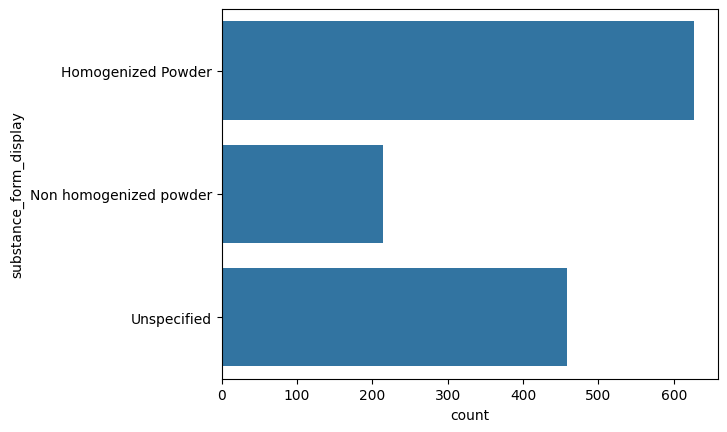

In [6]:
sns.countplot(data['substance_form_display'])

<Axes: xlabel='count', ylabel='device_serial'>

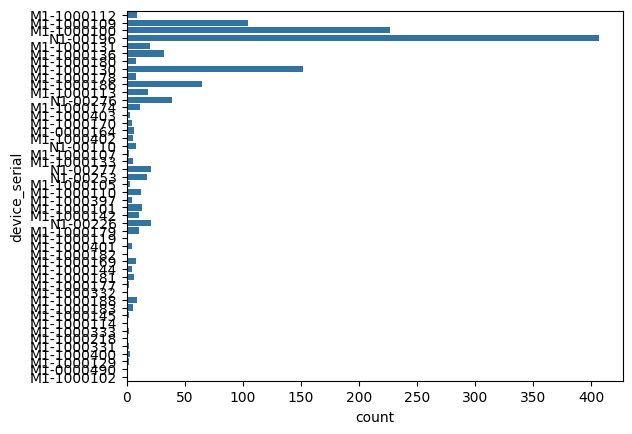

In [9]:
sns.countplot(data['device_serial'])

<Axes: xlabel='PURITY', ylabel='Density'>

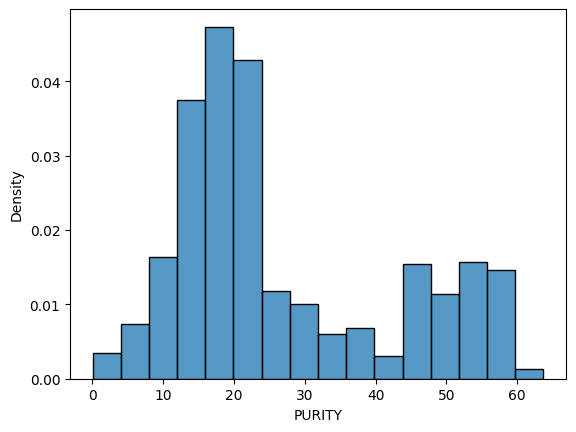

In [39]:
sns.histplot(data['PURITY'], stat='density')

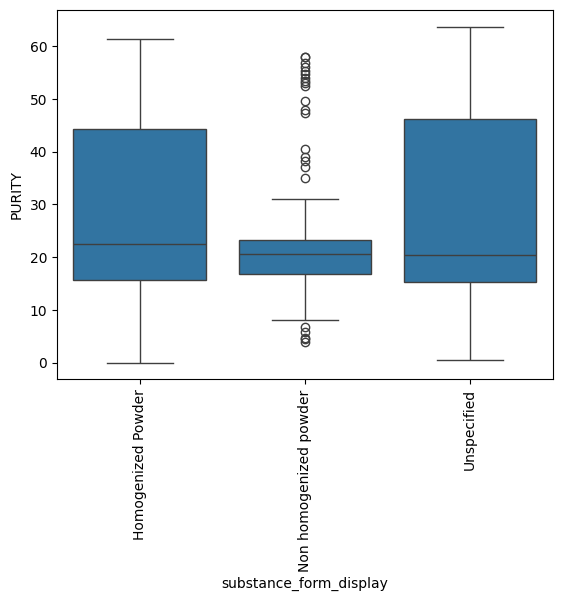

In [11]:
ax = sns.boxplot(y = 'PURITY', x = 'substance_form_display', data = data, orient = 'v')
ax.tick_params(axis='x', rotation=90)

In [7]:
data.iloc[:, 6:].corr()

,908.1,914.3,920.5,926.7,932.9,939.1,945.3,951.5,957.7,963.8,...,1620.5,1626.6,1632.8,1639,1645.2,1651.4,1657.6,1663.8,1670,1676.2
908.1,1.000000,0.998460,0.993954,0.984899,0.971927,0.956041,0.940548,0.927388,0.916314,0.906497,...,0.875120,0.872192,0.865113,0.860412,0.865169,0.877220,0.889740,0.897506,0.902171,0.907569
914.3,0.998460,1.000000,0.998343,0.992458,0.982830,0.970211,0.957275,0.945968,0.936309,0.927630,...,0.857357,0.853181,0.844482,0.838333,0.842423,0.854481,0.867216,0.875014,0.879607,0.885286
920.5,0.993954,0.998343,1.000000,0.997818,0.991549,0.981833,0.971355,0.961961,0.953725,0.946210,...,0.836331,0.831022,0.820818,0.813274,0.816773,0.829015,0.842235,0.850331,0.855020,0.861102
926.7,0.984899,0.992458,0.997818,1.000000,0.997799,0.991591,0.984015,0.976857,0.970285,0.964132,...,0.807270,0.800682,0.788790,0.779712,0.782600,0.795140,0.809034,0.817629,0.822613,0.829331
932.9,0.971927,0.982830,0.991549,0.997799,1.000000,0.997912,0.993495,0.988628,0.983790,0.979042,...,0.773126,0.765166,0.751504,0.740889,0.743158,0.755909,0.770327,0.779283,0.784515,0.791857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651.4,0.877220,0.854481,0.829015,0.795140,0.755909,0.716904,0.685710,0.662438,0.644478,0.629767,...,0.987486,0.991440,0.994775,0.997207,0.999107,1.000000,0.998882,0.995804,0.991162,0.985387
1657.6,0.889740,0.867216,0.842235,0.809034,0.770327,0.731455,0.700095,0.676522,0.658189,0.643073,...,0.981462,0.985927,0.989669,0.992777,0.996021,0.998882,1.000000,0.998997,0.996241,0.992185
1663.8,0.897506,0.875014,0.850331,0.817629,0.779283,0.740424,0.708838,0.684933,0.666216,0.650696,...,0.973450,0.978491,0.982761,0.986621,0.991141,0.995804,0.998997,1.000000,0.999107,0.996730
1670,0.902171,0.879607,0.855020,0.822613,0.784515,0.745635,0.713775,0.689498,0.670384,0.654453,...,0.963986,0.969606,0.974441,0.979093,0.984843,0.991162,0.996241,0.999107,1.000000,0.999235


<Axes: >

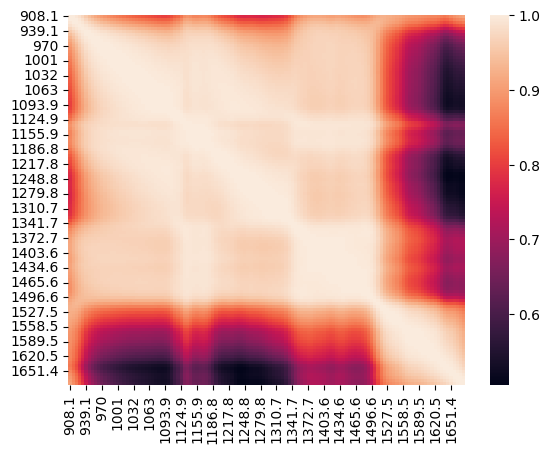

In [8]:
sns.heatmap(data.iloc[:, 6:].corr())

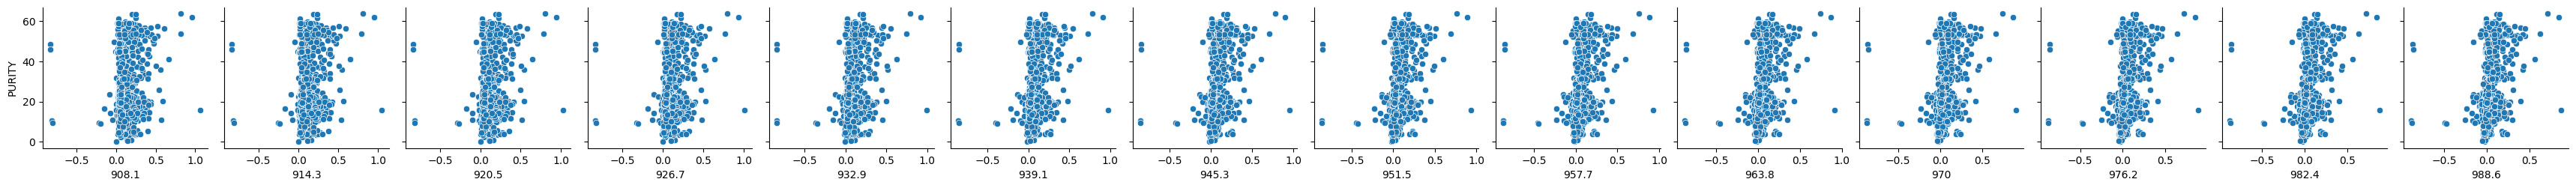

In [47]:
sns.pairplot(data=data, x_vars= data.iloc[:, 6:20].columns.values, y_vars = 'PURITY')

In [6]:
corrwithpurity = data.iloc[:, 6:].corrwith(data['PURITY'])
print(corrwithpurity)
print(np.where(np.abs(corrwithpurity) <= 0.05))

908.1     0.095510
914.3     0.121911
920.5     0.151335
926.7     0.186076
932.9     0.221205
            ...   
1651.4   -0.277282
1657.6   -0.243604
1663.8   -0.214220
1670     -0.187736
1676.2   -0.160472
Length: 125, dtype: float64
(array([96, 97]),)


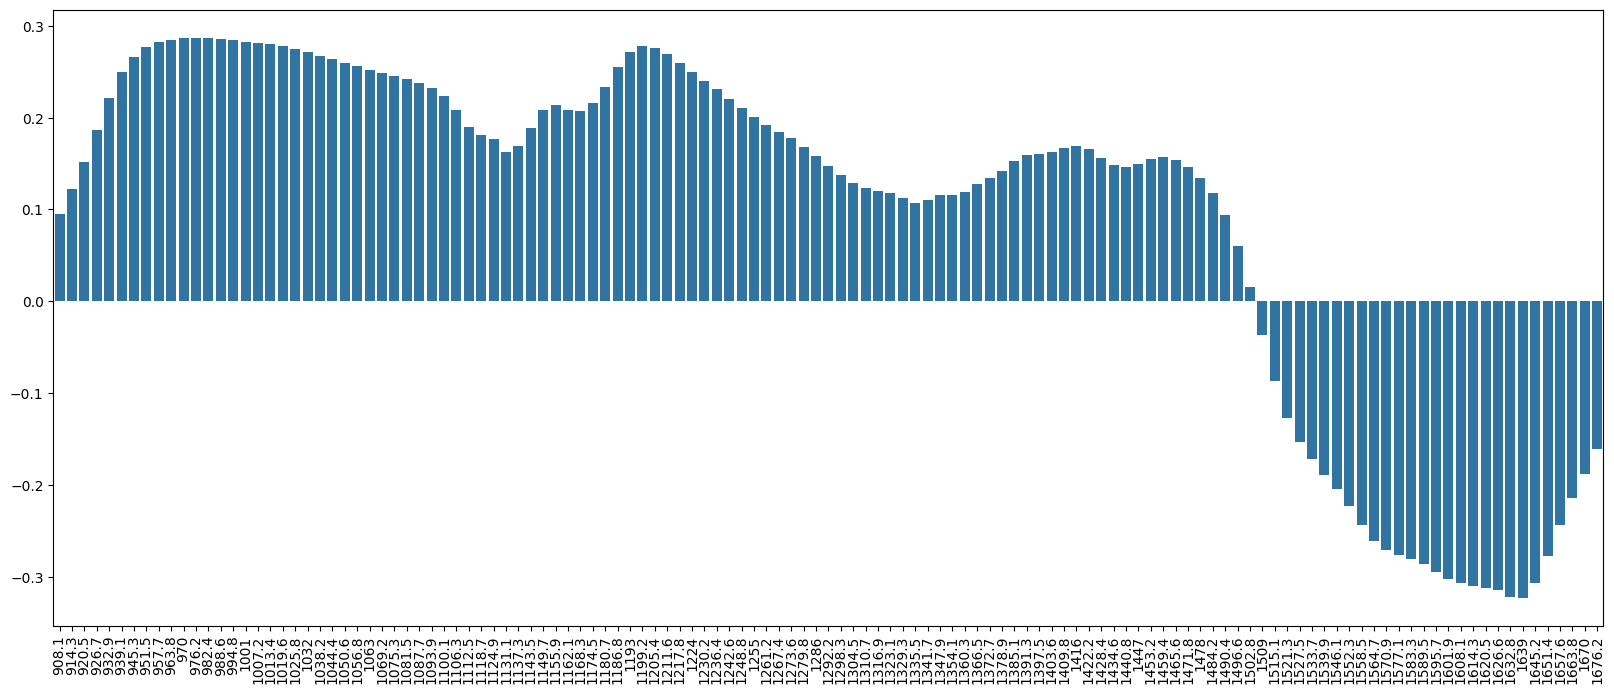

In [24]:
plt.figure(figsize=(20,8))
ax = sns.barplot(data = corrwithpurity)
ax.tick_params(axis='x', rotation=90)


/var/folders/93/xgf_b79s5sd1vjn_794f14ym0000gn/T/ipykernel_13737/1111853530.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = data, x = 'PURITY', shade = True, hue = 'substance_form_display')


<Axes: xlabel='PURITY', ylabel='Density'>

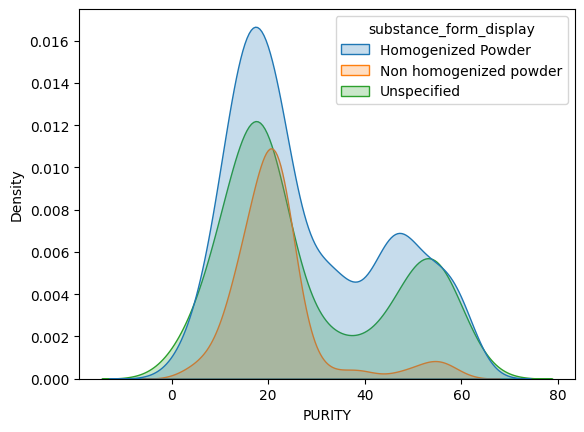

In [28]:
sns.kdeplot(data = data, x = 'PURITY', shade = True, hue = 'substance_form_display')

In [31]:
data['measure_type_display'].describe()

count               1300
unique                 2
top       Direct contact
freq                1296
Name: measure_type_display, dtype: object

/Users/amelielheritier/anaconda3/envs/MLCourse/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/amelielheritier/anaconda3/envs/MLCourse/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/amelielheritier/anaconda3/envs/MLCourse/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/amelielheritier/anaconda3/envs/MLCourse/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` i

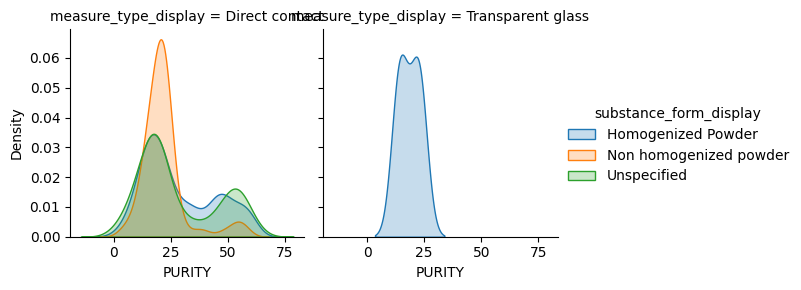

In [38]:
g = sns.FacetGrid(data, col = 'measure_type_display', hue = 'substance_form_display')
g.map(sns.kdeplot, 'PURITY', shade = True)
g.add_legend()

<Axes: xlabel='count', ylabel='substance'>

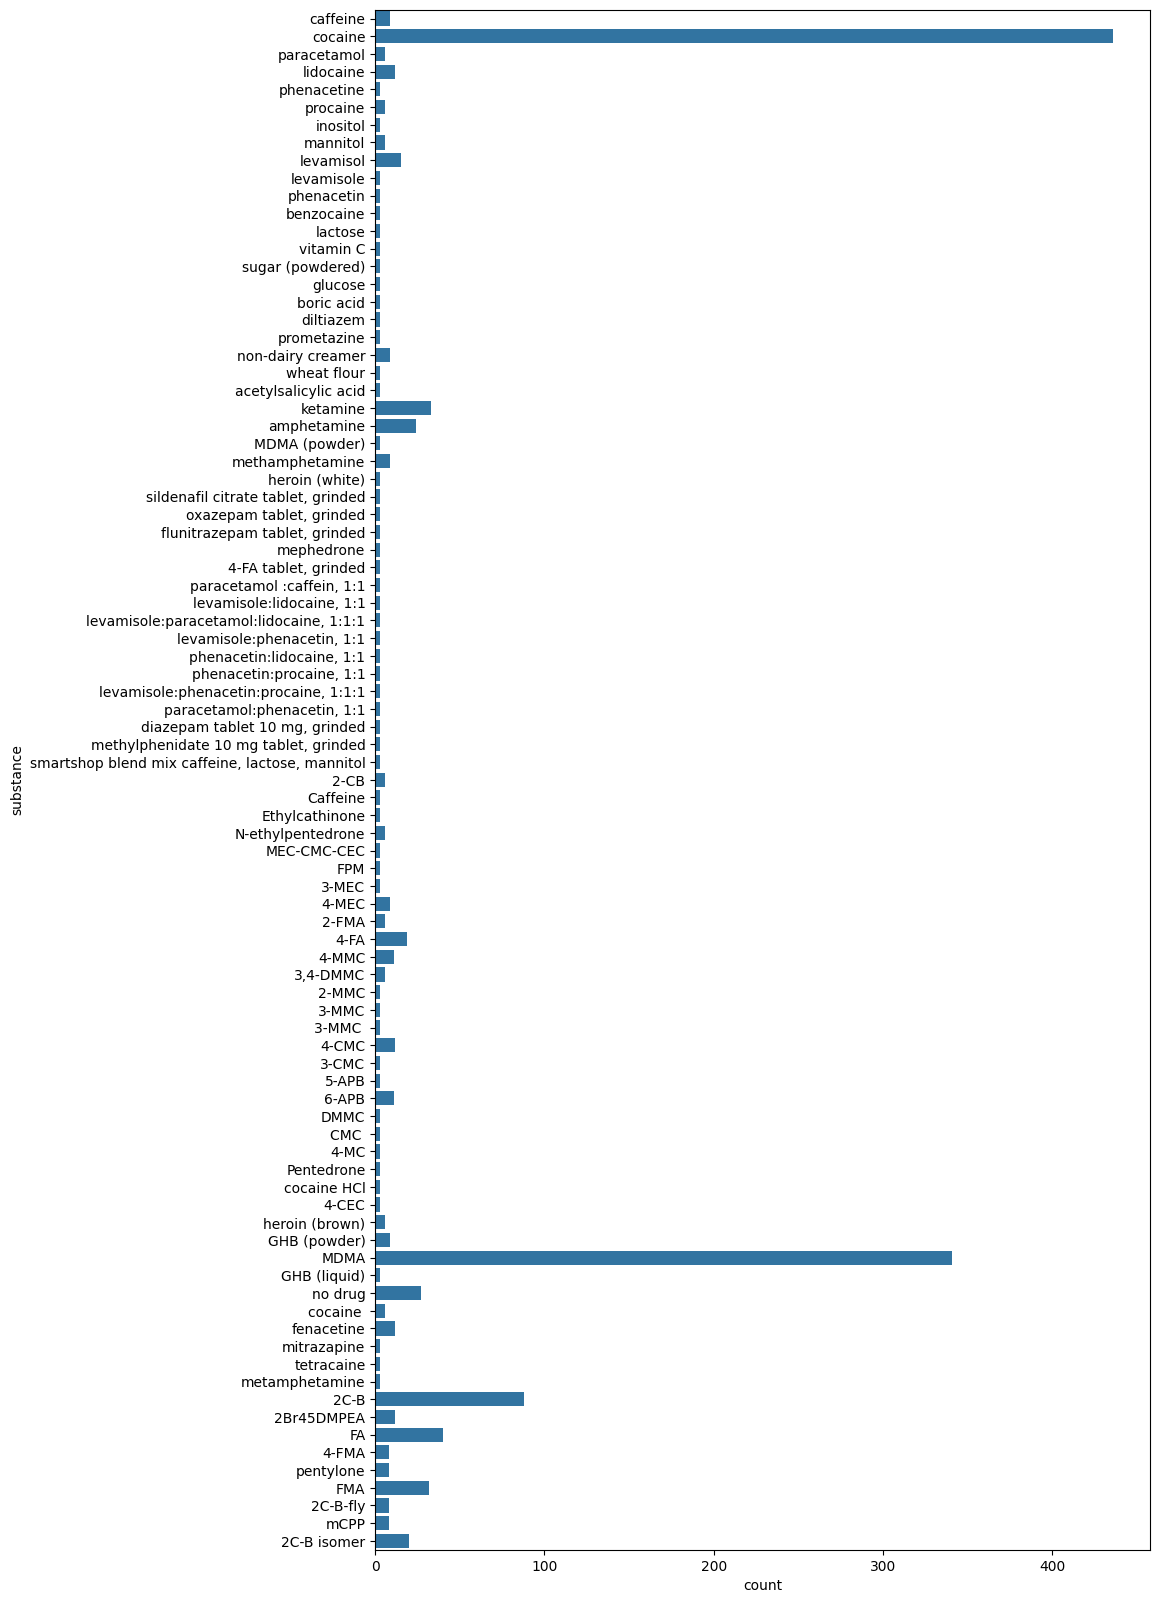

In [48]:
plt.figure(figsize=(10,20))
sns.countplot(substances_pure['substance'])